# Performance testing results

We provide benchmarks for the prediction and recommendation endpoints for different algorithms using our reference machine of four workers sending 1000 requests to the recommendation server. The results for each algorithm are detailed below.

## Setup

In [1]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
class ConfigReader:
    def get_value(self, key):
        with open('config.json') as json_data_file:
            data = json.load(json_data_file)
        return data[key]

In [3]:
results_folder = "results/"

def print_stats_from_file(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))  
    times = obj['times']
    time_taken_all = obj['time_taken_all']
    num_requests = obj['num_requests']
    print(f'Number of requests: {num_requests}')    
    print(f'Total response time: {round(time_taken_all, 3)}')
    print(f'Throughput (requests per second): {round(num_requests / time_taken_all, 3)}')
    print(f'Peak response time: {round(max(times), 3)}')
    print(f'Mean response time: {round(np.mean(times), 3)}')
    print(f'99 percentile: {round(np.quantile(times, 0.99), 3)}')    
    
def plot_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))
    resp_time_per_request = obj['times']
    plt.plot(resp_time_per_request)
    plt.show()
    
def hist_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    resp_time_per_request = obj['times']
    plt.hist(resp_time_per_request, bins='auto')
    plt.title('Number of requests over time')
    plt.xlabel('Time')
    plt.ylabel('Requests')
    plt.show()
    
def create_df(file_name, algo, num_workers):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    df = pd.DataFrame(obj['times'])
    df['Workers'] = num_workers
    df['Algorithm'] = algo    
    df.rename(columns={0:'Time'}, inplace=True)
    return df

## Show results

### Get config values

In [4]:
reader = ConfigReader()
n_rand_users = num_requests = reader.get_value("num_requests")
base_url = reader.get_value("rec_server_base_url")
n_recs = reader.get_value("n_recs")
items = reader.get_value("items")
pred_algos = reader.get_value("pred_algos")
rec_algos = reader.get_value("rec_algos")
lk_recserver_algos = reader.get_value('lk_recserver_algos')
linear_speedup_algos = reader.get_value("linear_speedup_algos")
workers_config = reader.get_value("workers_config")

### Predict and recommend endpoints from server for canonical config

#### Predictions for different algorithms

Algorithm: bias
Number of requests: 1000
Total response time: 10.96
Throughput (requests per second): 91.242
Peak response time: 0.101
Mean response time: 0.087
99 percentile: 0.095


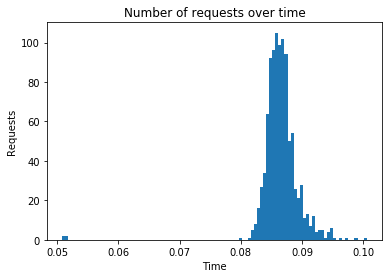

---------------------

Algorithm: itemitem
Number of requests: 1000
Total response time: 51.418
Throughput (requests per second): 19.448
Peak response time: 3.846
Mean response time: 0.407
99 percentile: 1.342


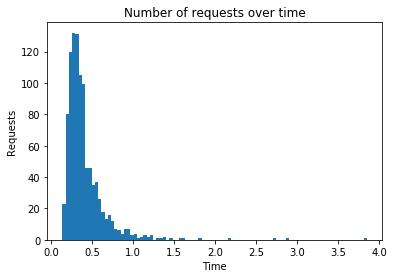

---------------------

Algorithm: useruser
Number of requests: 1000
Total response time: 21.567
Throughput (requests per second): 46.367
Peak response time: 0.204
Mean response time: 0.171
99 percentile: 0.192


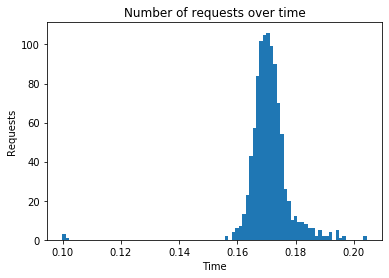

---------------------

Algorithm: biasedmf
Number of requests: 1000
Total response time: 10.873
Throughput (requests per second): 91.972
Peak response time: 0.103
Mean response time: 0.086
99 percentile: 0.094


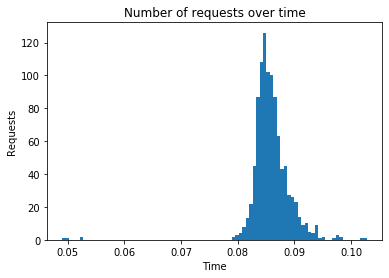

---------------------

Algorithm: implicitmf
Number of requests: 1000
Total response time: 10.826
Throughput (requests per second): 92.373
Peak response time: 0.105
Mean response time: 0.086
99 percentile: 0.095


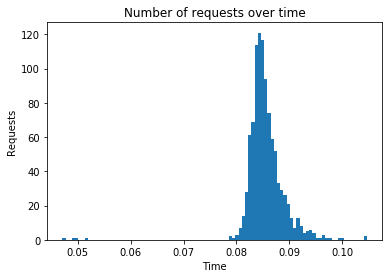

---------------------

Algorithm: funksvd
Number of requests: 1000
Total response time: 10.826
Throughput (requests per second): 92.368
Peak response time: 0.101
Mean response time: 0.085
99 percentile: 0.094


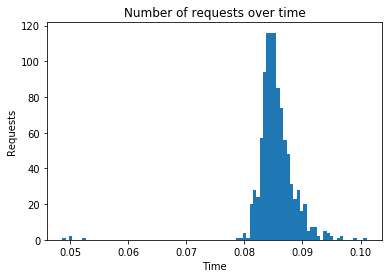

---------------------

Algorithm: tf_bpr
Number of requests: 1000
Total response time: 19.537
Throughput (requests per second): 51.186
Peak response time: 0.33
Mean response time: 0.155
99 percentile: 0.199


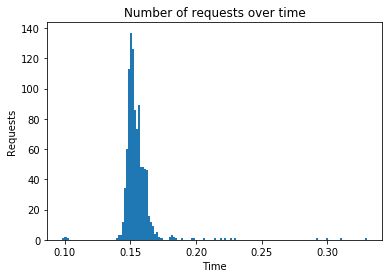

---------------------



In [5]:
for algo in pred_algos:
    print(f'Algorithm: {algo}')
    file_name = f'preds_{algo}_workers_4_num_req_{num_requests}.pickle'  
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('---------------------')
    print('')

#### Recommendations

Algorithm: popular
Number of requests: 1000
Total response time: 0.682
Throughput (requests per second): 1467.233
Peak response time: 0.01
Mean response time: 0.005
99 percentile: 0.008


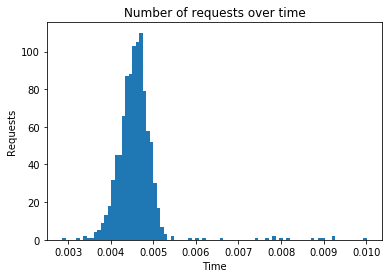

---------------------



In [6]:
for algo_rec in rec_algos:
    print(f'Algorithm: {algo_rec}')
    file_name = f'recs_{algo_rec}_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('---------------------')
    print('')

### Lenskit

Algo: bias
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.494
Throughput (requests per second): 2023.091
Peak response time: 0.006
Mean response time: 0.0
99 percentile: 0.0


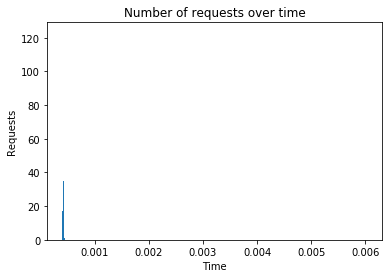

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 10.941
Throughput (requests per second): 91.4
Peak response time: 0.103
Mean response time: 0.087
99 percentile: 0.096


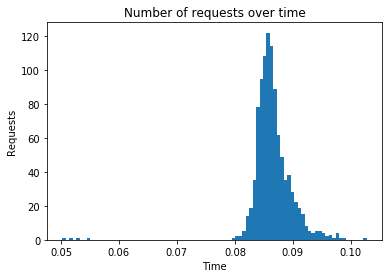

*******************************************************
Algo: biasedmf
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.341
Throughput (requests per second): 2928.45
Peak response time: 0.005
Mean response time: 0.0
99 percentile: 0.0


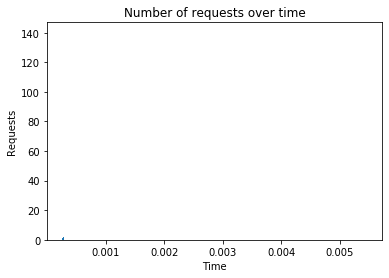

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 10.872
Throughput (requests per second): 91.978
Peak response time: 0.102
Mean response time: 0.086
99 percentile: 0.096


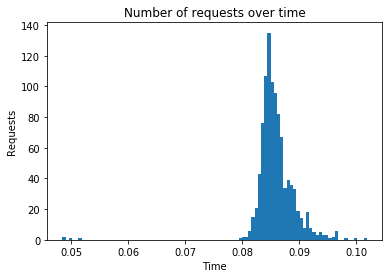

*******************************************************
Algo: itemitem
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 101.677
Throughput (requests per second): 9.835
Peak response time: 2.224
Mean response time: 0.102
99 percentile: 0.679


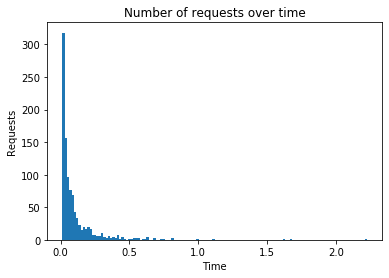

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 52.11
Throughput (requests per second): 19.19
Peak response time: 3.866
Mean response time: 0.412
99 percentile: 1.324


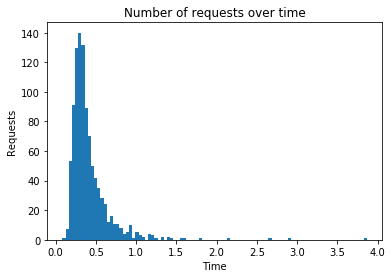

*******************************************************
Algo: tf_bpr
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 26.686
Throughput (requests per second): 37.473
Peak response time: 0.2
Mean response time: 0.027
99 percentile: 0.03


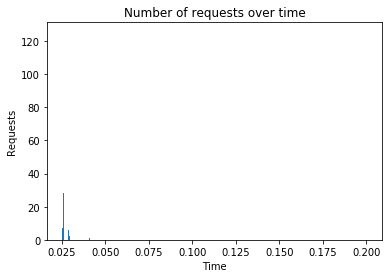

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 20.594
Throughput (requests per second): 48.559
Peak response time: 0.2
Mean response time: 0.163
99 percentile: 0.185


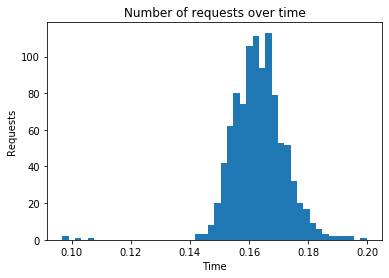

*******************************************************


In [7]:
for lk_recserver_algo in lk_recserver_algos:
    print(f'Algo: {lk_recserver_algo}')
    print('------------------')    
    print('Lenskit performance:')
    file_name = f'lkpy_{lk_recserver_algo}_num_req_{num_requests}.pickle'    
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('------------------')    
    print('Recommendation server performance:')
    file_name = f'preds_{lk_recserver_algo}_against_lkpy_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('*******************************************************')    

### Speedup Tests

#### Throughput by number of workers

Algo: biasedmf


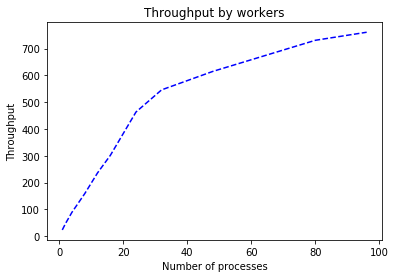

*******************************************************
Algo: itemitem


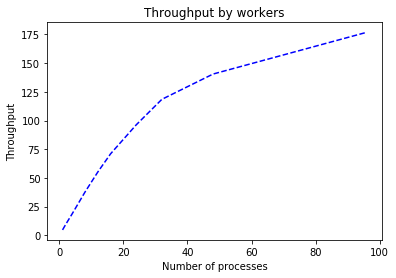

*******************************************************
Algo: tf_bpr


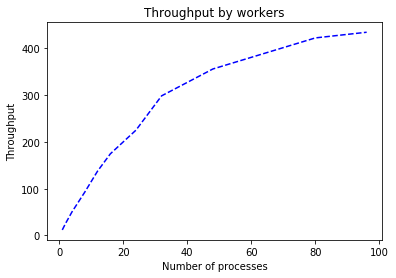

*******************************************************


In [8]:
for algo in linear_speedup_algos:
    print(f'Algo: {algo}')    
    throughput_file_name_workers = f'{results_folder}throughput_single_multiple_workers_algo_{algo}.csv'
    throughputs_workers_from_file = np.genfromtxt(throughput_file_name_workers, delimiter=',')
    y_pos = np.arange(len(throughputs_workers_from_file))
#    plt.bar(y_pos, throughputs_workers_from_file, align='center', alpha=0.5)
    plt.plot(workers_config, throughputs_workers_from_file, 'b--')
#    plt.xticks(y_pos, workers_config)
    plt.ylabel('Throughput')
    plt.xlabel('Number of processes')
    plt.title('Throughput by workers')

    plt.show()
    print('*******************************************************')
    

#### Plots by number of workers

In [9]:
df = pd.read_csv(f'{results_folder}throughput_single_multiple_workers_algo_biasedmf.csv', header=None)
df['Workers'] = workers_config
df.rename(columns={0:'Throughput'}, inplace=True) 
df

,Throughput,Workers
0,23.483387,1
1,47.272029,2
2,88.971235,4
3,158.733038,8
4,236.243983,12
5,301.755443,16
6,463.470694,24
7,546.190722,32
8,615.088754,48
9,731.199917,80


Algorithm: biasedmf


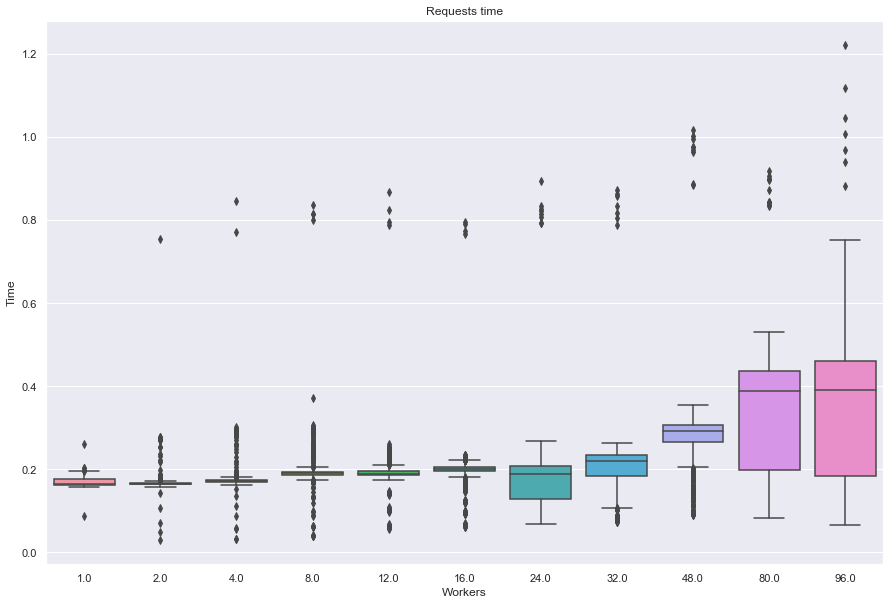

---------------------



In [10]:
sns.set(rc={'figure.figsize':(15, 10)})
for algo in linear_speedup_algos:
    df = pd.DataFrame({'Times': [], 'Workers': [], 'Algorithm': []})
    print(f'Algorithm: {algo}')
    for w in workers_config:
        file_name = f'linear_speedup_preds_{algo}_workers_{w}_num_req_1000.pickle'
        df_temp = create_df(file_name, algo, w)
        df = df.append(df_temp, ignore_index=True)
    plt.title('Requests time')
    ax = sns.boxplot(x="Workers", y="Time", data=df)
    plt.show()
    print('---------------------')
    print('')
    break

In [11]:
df[df['Workers'] == 24]['Time'].describe()

count    1000.000000
mean        0.183649
std         0.073715
min         0.068007
25%         0.128885
50%         0.188997
75%         0.207774
max         0.893476
Name: Time, dtype: float64

In [12]:
df[df['Workers'] == 48]['Time'].describe()

count    1000.000000
mean        0.269109
std         0.093597
min         0.089307
25%         0.265133
50%         0.291107
75%         0.305615
max         1.016039
Name: Time, dtype: float64

In [13]:
for w in workers_config:
    print(f"Worker: {w}, Mean Time: {df[df['Workers'] == w]['Time'].mean()}")

Worker: 1, Mean Time: 0.16933080368420633
Worker: 2, Mean Time: 0.1678498732119333
Worker: 4, Mean Time: 0.1769776633818401
Worker: 8, Mean Time: 0.19603982038088724
Worker: 12, Mean Time: 0.19488702520968218
Worker: 16, Mean Time: 0.20030749574633955
Worker: 24, Mean Time: 0.18364940203385777
Worker: 32, Mean Time: 0.21081128295401869
Worker: 48, Mean Time: 0.2691085608160647
Worker: 80, Mean Time: 0.3322938989320246
Worker: 96, Mean Time: 0.3337401035259827
